RUSSIA VS UKRAINE WAR SENTIMENT ANALYSIS

In [103]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
!pip install wordcloud
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
import re
from nltk.corpus import stopwords
import string
data = pd.read_csv("Desktop/Russia vs ukraine Twitter.csv", encoding = "ISO-8859-1", dtype={'text':str})
print(data.head())

                    id      conversation_id               created_at  \
0  1528925500290347008  1528925500290347008  2022-05-24 02:26:59 UTC   
1  1528925499392724992  1528925499392724992  2022-05-24 02:26:59 UTC   
2  1528925495919788032  1528699107769995265  2022-05-24 02:26:58 UTC   
3  1528925485367013376  1528925485367013376  2022-05-24 02:26:56 UTC   
4  1528925484255281155  1528925484255281155  2022-05-24 02:26:56 UTC   

         date      time  timezone              user_id       username  \
0  2022-05-24  02:26:59         0  1511380221110460421  applegate1956   
1  2022-05-24  02:26:59         0           2697297488        jonmdad   
2  2022-05-24  02:26:58         0            346057221        big_hal   
3  2022-05-24  02:26:56         0  1089187317716275200      reddblakk   
4  2022-05-24  02:26:56         0  1280324149286539265    1drewgordon   

              name place  ... geo source user_rt_id user_rt retweet_id  \
0          Top Kat   NaN  ... NaN    NaN        NaN   

In [61]:
print(data.columns)

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')


In [62]:
data = data[["username","tweet","language"]]

In [63]:
data.isnull().sum()

username    0
tweet       0
language    0
dtype: int64

In [64]:
data["language"].value_counts()

en     9069
pt      407
und     120
it       93
in       63
es       59
ru       33
ja       31
ca       29
nl       12
de       11
tl       11
zh       10
ro       10
fr        9
fi        8
el        6
et        5
hi        4
pl        3
ur        3
ml        2
th        2
vi        2
ko        2
uk        2
cs        2
da        1
ht        1
tr        1
bg        1
am        1
cy        1
ta        1
ar        1
hu        1
Name: language, dtype: int64

In [93]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["tweet"] = data["tweet"].apply(clean)


In [94]:
text = " ".join(i for i in data.tweet)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)


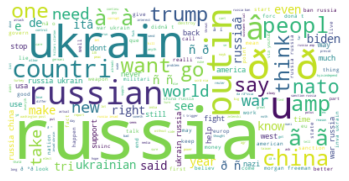

In [106]:
from matplotlib.figure import Figure
f = Figure( figsize =(15,25) )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [107]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["tweet"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["tweet"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["tweet"]]
data = data[["tweet", "Positive", "Negative", "Neutral"]]
print(data.head())

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\likhith\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                               tweet  Positive  Negative  \
0  Iâm confused - whoâs economy was supposed ...     0.079     0.070   
1  Was it Putin?, Voldemorte Putin.... of Russia ...     0.227     0.174   
2  @qireau @tribelaw You are wrong about prices. ...     0.000     0.104   
3                  why tf russia ban john mccainð­     0.000     0.419   
4  Microsoft says Russia hit Ukraine with hundred...     0.000     0.000   

   Neutral  
0    0.851  
1    0.598  
2    0.896  
3    0.581  
4    1.000  


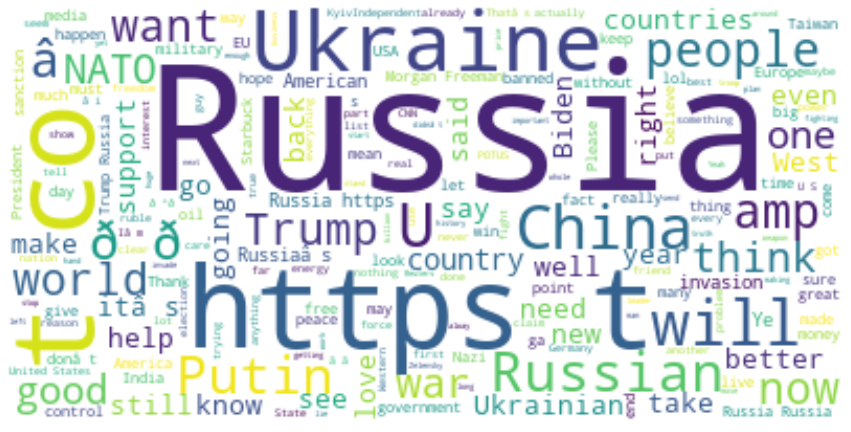

In [108]:
positive =' '.join([i for i in data['tweet'][data['Positive'] > data["Negative"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(positive)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

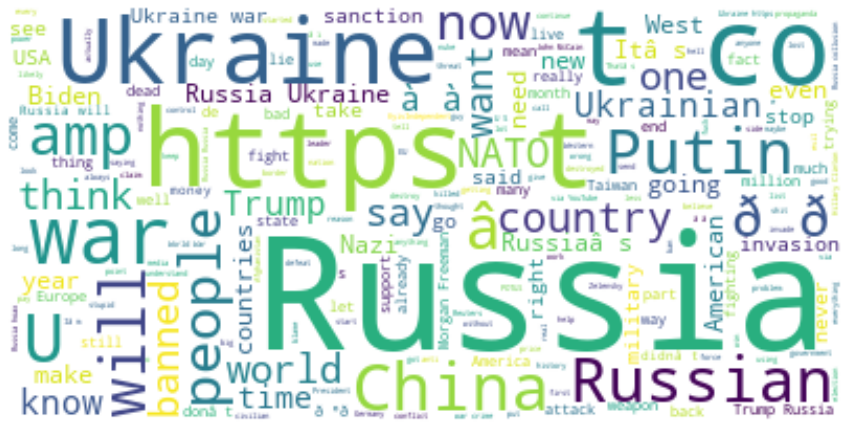

In [109]:
negative =' '.join([i for i in data['tweet'][data['Negative'] > data["Positive"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(negative)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

HENCE WE CAN CONCLUDE WITH THE ANALYSIS OF RUSSIA AND UKRAINE WAR SENTIMENT ANALYSIS